In [1]:
## Bank_Personal_Loan_Modelling

import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
HBFC = pd.read_excel(r'C:\Users\ASUS\Downloads\HBFC Bank.xlsx', sheet_name='Bank_Personal_Loan_Modelling')

In [7]:
HBFC.head()

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,TD Account,Online,CreditCard
0,15,67,41,112,100+,91741,1.0,2.0,Undergraduate,0,No,Yes,No,No,No
1,1481,67,42,32,0-50,93943,1.0,1.1,Professional,0,No,No,No,No,Yes
2,1860,67,41,20,0-50,91741,2.0,0.4,Undergraduate,80,No,No,No,No,No
3,2847,67,43,105,100+,93711,4.0,1.7,Graduate,0,No,No,No,Yes,No
4,3265,67,41,114,100+,95616,4.0,2.4,Professional,0,No,No,No,Yes,No


In [8]:
HBFC.isnull().sum()

ID                        0
Age (in years)            0
Experience (in years)     0
Income (in K/year)        0
Income Categorical        0
ZIP Code                  0
Family members           18
CCAvg                     0
Education                 0
Mortgage                  0
Personal Loan             0
Securities Account        0
TD Account                0
Online                    0
CreditCard                0
dtype: int64

In [9]:
HBFC.columns

Index(['ID', 'Age (in years)', 'Experience (in years)', 'Income (in K/year)',
       'Income Categorical', 'ZIP Code', 'Family members', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'TD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
HBFC['Family members']=HBFC['Family members'].fillna(HBFC['Family members'].mean())

In [11]:
HBFC.isnull().sum()

ID                       0
Age (in years)           0
Experience (in years)    0
Income (in K/year)       0
Income Categorical       0
ZIP Code                 0
Family members           0
CCAvg                    0
Education                0
Mortgage                 0
Personal Loan            0
Securities Account       0
TD Account               0
Online                   0
CreditCard               0
dtype: int64

In [13]:
HBFC_dummies = pd.get_dummies(HBFC,prefix=['PL'],columns=['Personal Loan'])

In [23]:
percentage_pl = HBFC_dummies['PL_Yes'].count()/HBFC_dummies['PL_Yes'].sum()

In [24]:
percentage_pl

10.416666666666666

In [35]:

median_values = HBFC_dummies.median()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1244\1912380927.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = HBFC_dummies.median()


In [36]:
median_values

ID                        2500.5
Age (in years)              45.0
Experience (in years)       20.0
Income (in K/year)          64.0
ZIP Code                 93437.0
Family members               2.0
CCAvg                        1.5
Mortgage                     0.0
PL_No                        1.0
PL_Yes                       0.0
dtype: float64

In [37]:
mean_values = HBFC_dummies.mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1244\2508650705.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = HBFC_dummies.mean()


In [38]:
mean_values

ID                        2500.500000
Age (in years)              45.338400
Experience (in years)       20.134800
Income (in K/year)          73.774200
ZIP Code                 93152.503000
Family members               2.397230
CCAvg                        1.937938
Mortgage                    56.498800
PL_No                        0.904000
PL_Yes                       0.096000
dtype: float64

In [39]:
max_values = HBFC_dummies.max()

In [40]:
max_values

ID                                5000
Age (in years)                      67
Experience (in years)               43
Income (in K/year)                 224
Income Categorical              51-100
ZIP Code                         96651
Family members                     4.0
CCAvg                             10.0
Education                Undergraduate
Mortgage                           635
Securities Account                 Yes
TD Account                         Yes
Online                             Yes
CreditCard                         Yes
PL_No                                1
PL_Yes                               1
dtype: object

In [41]:
min_values =HBFC_dummies.min()
min_values

ID                              1
Age (in years)                 23
Experience (in years)           0
Income (in K/year)              8
Income Categorical           0-50
ZIP Code                     9307
Family members                1.0
CCAvg                         0.0
Education                Graduate
Mortgage                        0
Securities Account             No
TD Account                     No
Online                         No
CreditCard                     No
PL_No                           0
PL_Yes                          0
dtype: object

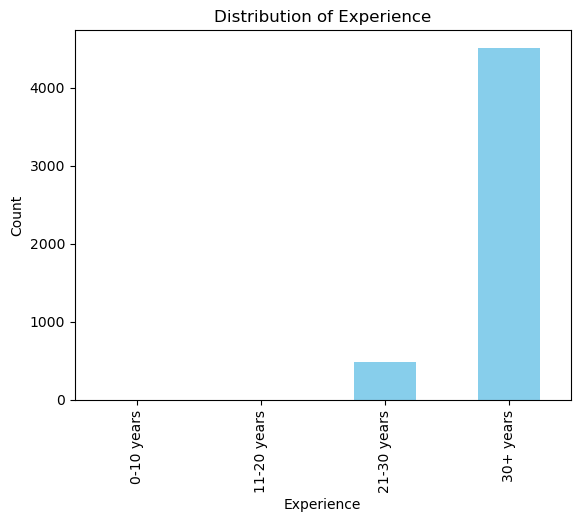

In [45]:
bins = [0, 10, 20, 30, 100]
labels = ['0-10 years', '11-20 years', '21-30 years', '30+ years']

HBFC_dummies['Experience (in years)'] = pd.cut(HBFC_dummies['Age (in years)'], bins=bins, labels=labels, right=False)

# Plot a bar graph
experience_counts = HBFC_dummies['Experience (in years)'].value_counts().sort_index()
experience_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.show()

In [46]:
HBFC_dummies.columns

Index(['ID', 'Age (in years)', 'Experience (in years)', 'Income (in K/year)',
       'Income Categorical', 'ZIP Code', 'Family members', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'TD Account', 'Online',
       'CreditCard', 'PL_No', 'PL_Yes'],
      dtype='object')

Text(0.5, 1.0, 'Scatter')

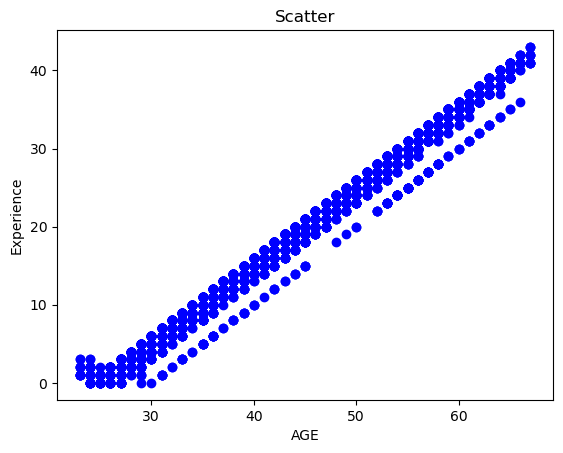

In [66]:
plt.scatter(HBFC['Age (in years)'],HBFC['Experience (in years)'],color='blue')
plt.xlabel('AGE')
plt.ylabel('Experience')
plt.title('Scatter')

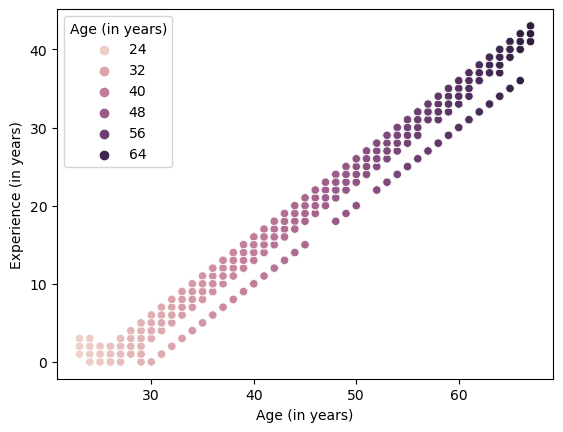

In [63]:
import seaborn as sns
sns.scatterplot(data=HBFC,x='Age (in years)',y='Experience (in years)',color="black",hue='Age (in years)')
plt.show()

In [67]:
top_zip_codes = HBFC['ZIP Code'].value_counts().head(3)

In [68]:
top_zip_codes 

94720    169
94305    127
95616    116
Name: ZIP Code, dtype: int64

In [72]:
HBFC.columns

Index(['ID', 'Age (in years)', 'Experience (in years)', 'Income (in K/year)',
       'Income Categorical', 'ZIP Code', 'Family members', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'TD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
## How many customers have a combination of Fixed Deposits and Credit Cards but not Personal Loan?

In [74]:
HBFC_dummies1= pd.get_dummies(HBFC, prefix=['PL','TD','Credit'], columns=['Personal Loan','TD Account','CreditCard'])

In [75]:
HBFC_dummies1.head(5)

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,Online,PL_No,PL_Yes,TD_No,TD_Yes,Credit_No,Credit_Yes
0,15,67,41,112,100+,91741,1.0,2.0,Undergraduate,0,Yes,No,1,0,1,0,1,0
1,1481,67,42,32,0-50,93943,1.0,1.1,Professional,0,No,No,1,0,1,0,0,1
2,1860,67,41,20,0-50,91741,2.0,0.4,Undergraduate,80,No,No,1,0,1,0,1,0
3,2847,67,43,105,100+,93711,4.0,1.7,Graduate,0,No,Yes,1,0,1,0,1,0
4,3265,67,41,114,100+,95616,4.0,2.4,Professional,0,No,Yes,1,0,1,0,1,0


In [ ]:
filter_customer = 

<Axes: xlabel='Education', ylabel='count'>

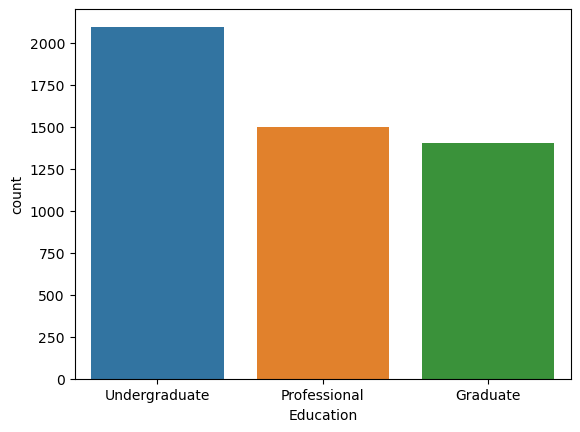

In [77]:
sns.countplot(data=HBFC, x='Education')

<Axes: >

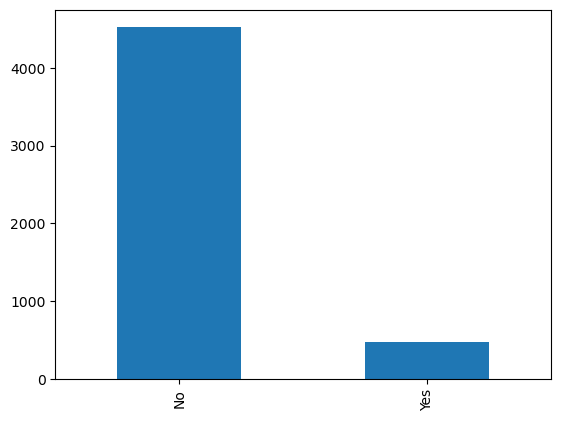

In [82]:
HBFC['Personal Loan'].value_counts().plot(kind='bar')

In [89]:
HBFC['Education'].value_counts()

Undergraduate    2096
Professional     1501
Graduate         1403
Name: Education, dtype: int64

<Axes: ylabel='Education'>

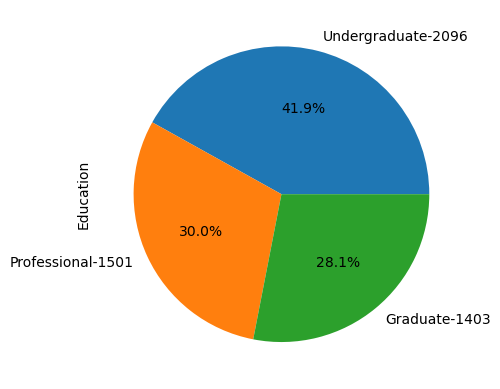

In [90]:
HBFC['Education'].value_counts().plot(kind='pie',autopct='%.1f%%',labels=['Undergraduate-2096', 'Professional-1501', 'Graduate-1403'])
